<a href="https://colab.research.google.com/github/koad7/NLP_PYTORCH/blob/main/PYTORCH_TUTO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
import numpy as np

In [2]:
data = [[1, 2], [3, 4]]
x_data = torch.tensor(data)

In [5]:
x_ones = torch.zeros_like(x_data) # retains the properties of x_data
print(f"Ones Tensor: \n {x_ones} \n")


Ones Tensor: 
 tensor([[0, 0],
        [0, 0]]) 



In [6]:

x_rand = torch.rand_like(x_data, dtype=torch.float) # overrides the datatype of x_data
print(f"Random Tensor: \n {x_rand} \n")

Random Tensor: 
 tensor([[0.4388, 0.8878],
        [0.4535, 0.9829]]) 



In [8]:
shape = (5, 3,)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f"Random Tensor: \n {rand_tensor} \n")
print(f"Ones Tensor: \n {ones_tensor} \n")
print(f"Zeros Tensor: \n {zeros_tensor}")

Random Tensor: 
 tensor([[0.9056, 0.5704, 0.3548],
        [0.6210, 0.0069, 0.9030],
        [0.3495, 0.0704, 0.8224],
        [0.0845, 0.3802, 0.7352],
        [0.7019, 0.3220, 0.6363]]) 

Ones Tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]) 

Zeros Tensor: 
 tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])


In [9]:
tensor = torch.rand(3, 4)

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


In [3]:
import torch
from torchvision.models import resnet18, ResNet18_Weights
model = resnet18(weights=ResNet18_Weights.DEFAULT)
data = torch.rand(1, 3, 64, 64)
labels = torch.rand(1, 1000)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 138MB/s]


In [4]:
prediction = model(data) # forward pass

We use the model’s prediction and the corresponding label to calculate the error (loss). The next step is to backpropagate this error through the network. Backward propagation is kicked off when we call .backward() on the error tensor. Autograd then calculates and stores the gradients for each model parameter in the parameter’s .grad attribute.

In [6]:
loss = (prediction - labels).sum()
loss.backward() # backward pass

Next, we load an optimizer, in this case SGD with a learning rate of 0.01 and momentum of 0.9. We register all the parameters of the model in the optimizer.

In [8]:
optim = torch.optim.SGD(model.parameters(), lr=1e-2, momentum=0.9)

Finally, we call .step() to initiate gradient descent. The optimizer adjusts each parameter by its gradient stored in .grad.



In [9]:
optim.step() #gradient descent

## Differentiation in Autograd

Let’s take a look at how autograd collects gradients. We create two tensors a and b with requires_grad=True. This signals to autograd that every operation on them should be tracked.

In [10]:
import torch

a = torch.tensor([2., 3.], requires_grad=True)
b = torch.tensor([6., 4.], requires_grad=True)

We create another tensor Q from a and b.

�
=
3
�
3
−
�
2
Q=3a
3
 −b
2

In [11]:
Q = 3*a**3 - b**2

Let’s assume a and b to be parameters of an NN, and Q to be the error. In NN training, we want gradients of the error w.r.t. parameters, i.e.

When we call .backward() on Q, autograd calculates these gradients and stores them in the respective tensors’ .grad attribute.

We need to explicitly pass a gradient argument in Q.backward() because it is a vector. gradient is a tensor of the same shape as Q, and it represents the gradient of Q w.r.t. itself, i.e.

In [12]:
# Equivalently, we can also aggregate Q into a scalar and call backward implicitly, like Q.sum().backward().

external_grad = torch.tensor([1., 1.])
Q.backward(gradient=external_grad)

In [13]:
# Gradients are now deposited in a.grad and b.grad

# check if collected gradients are correct
print(9*a**2 == a.grad)
print(-2*b == b.grad)

tensor([True, True])
tensor([True, True])


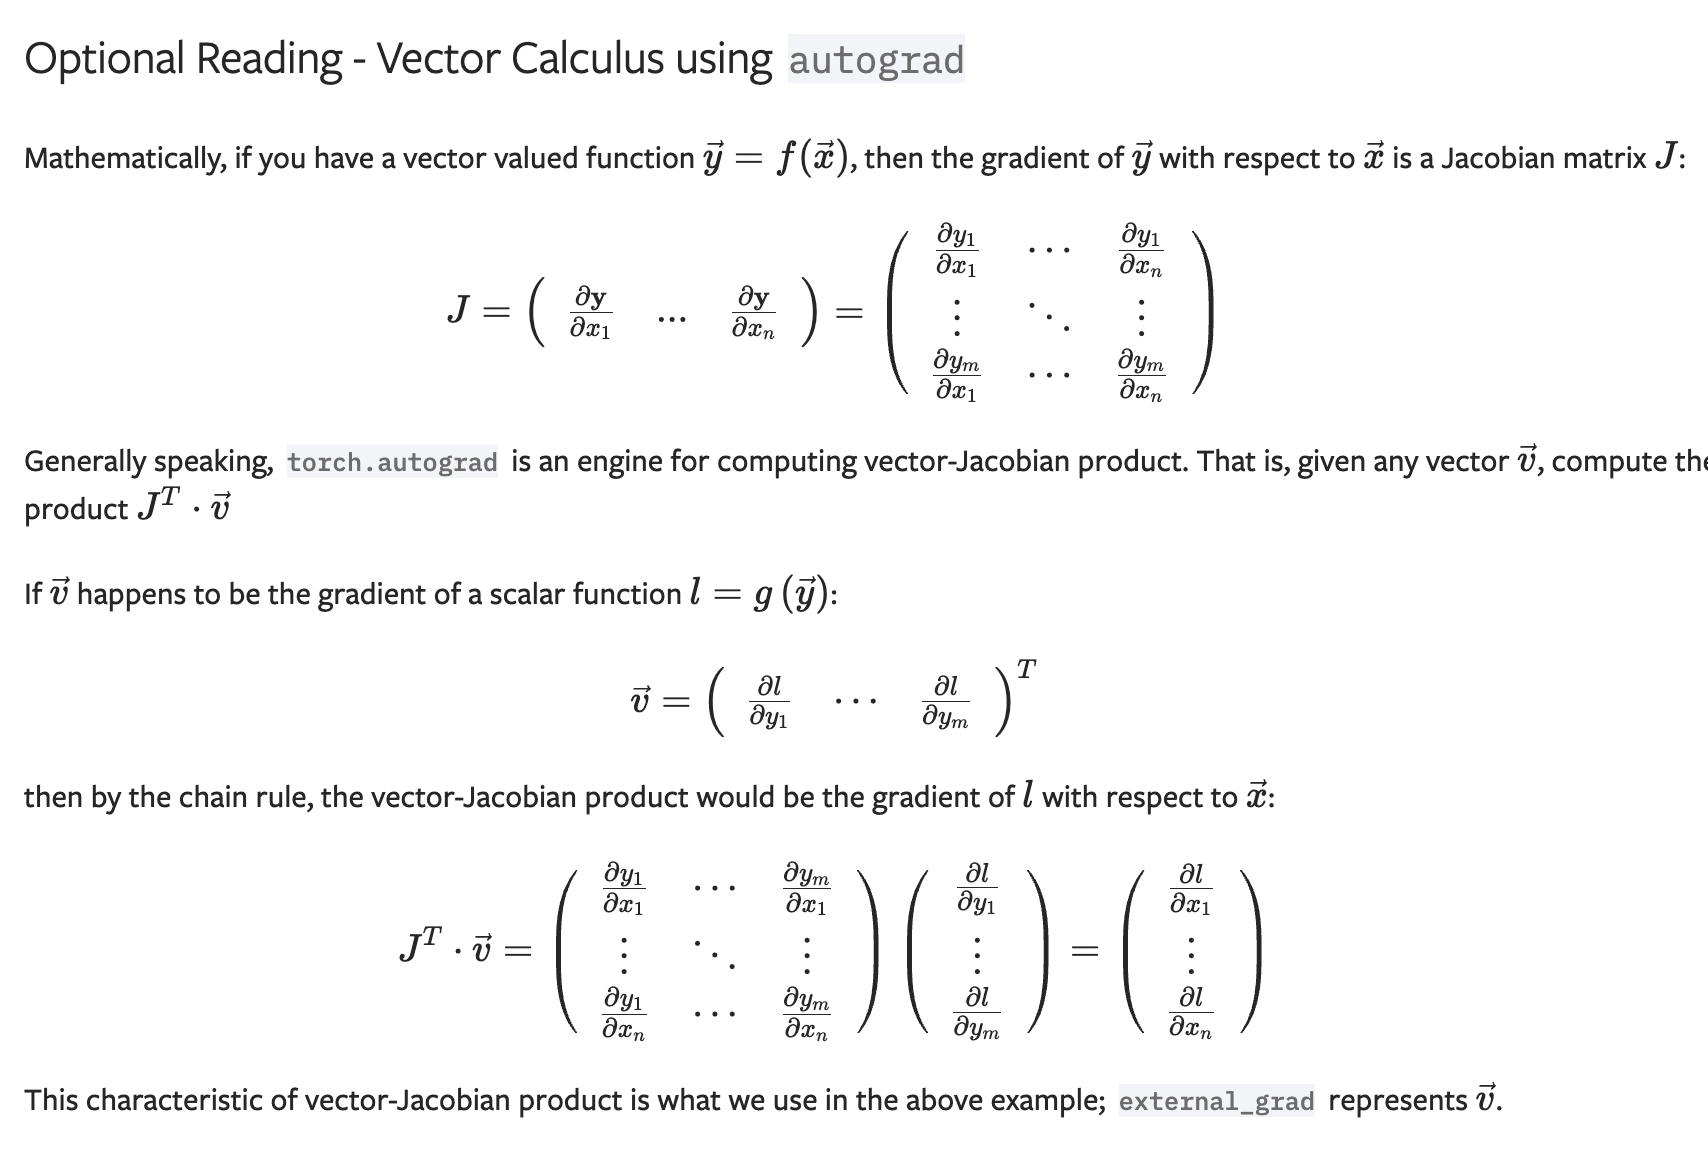

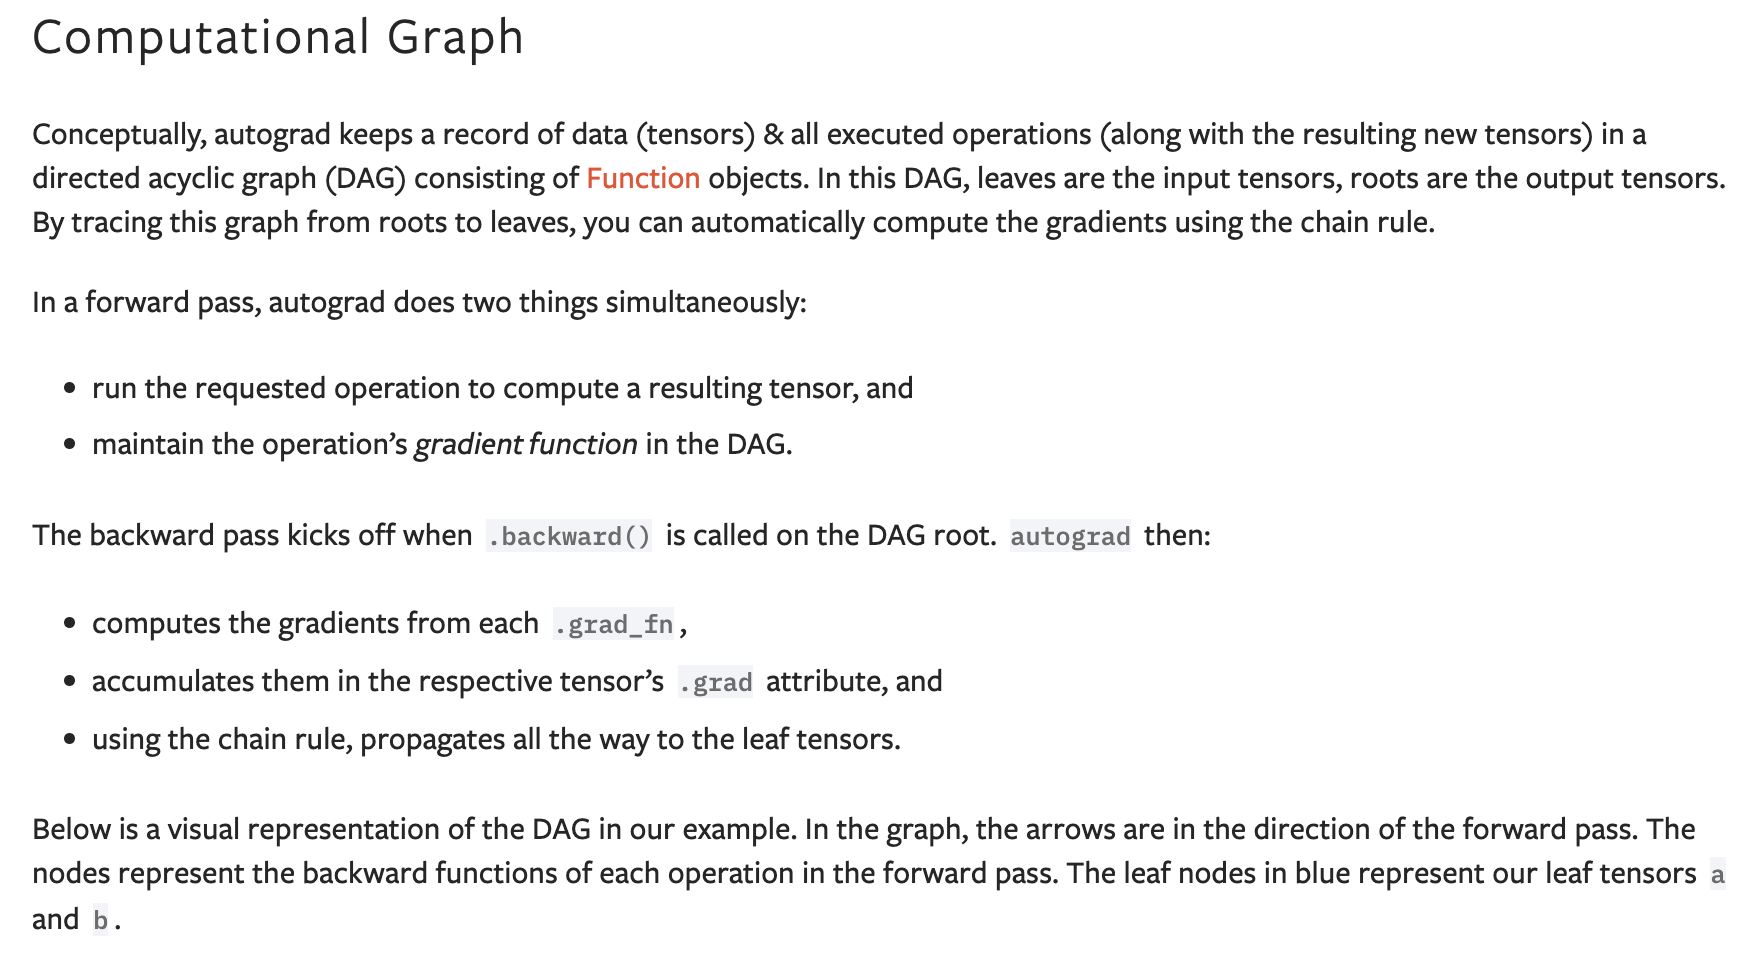

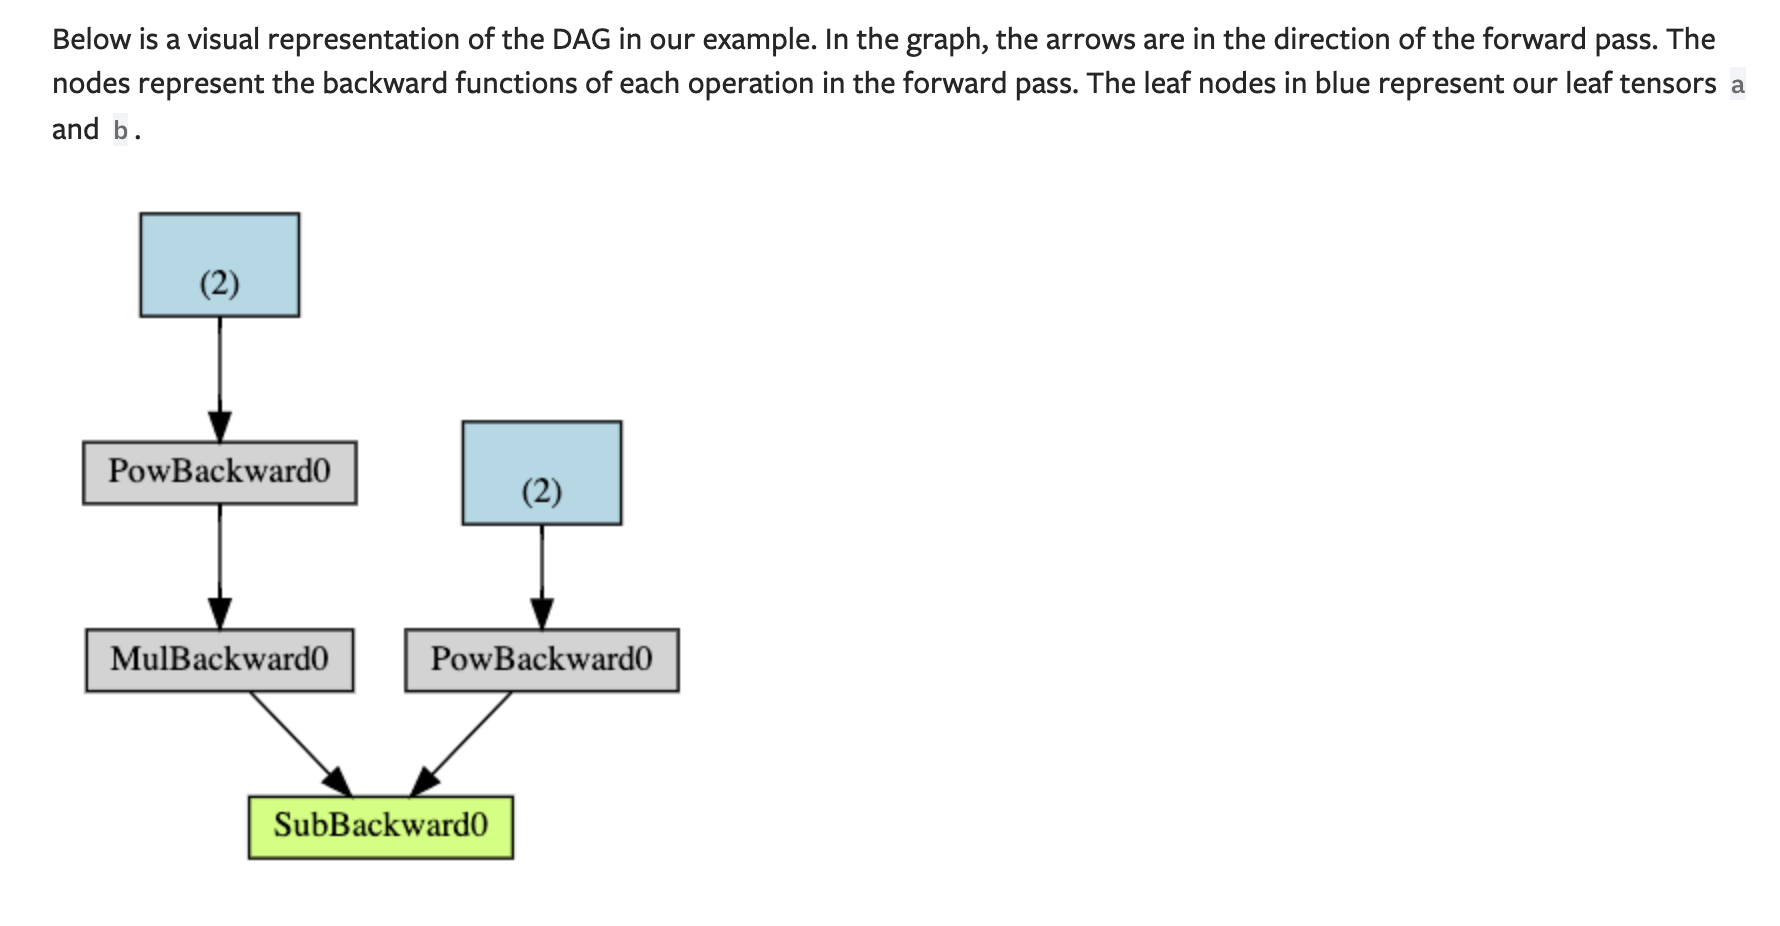

AttributeError: ignored